## Project Luther - William Baum

In [4]:
# Modeling
import pandas as pd
import numpy as np
import sklearn as sk

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Indexing & String Manipulation
from collections import defaultdict as dd
import re

%matplotlib inline

In [95]:
Path1 = '/Users/green/Documents/Data/ProjectLuther/SourceData/'
df1 = pd.read_csv(Path1+'Elevations.tsv') # Obtained Location information on Weather Stations Data by accessing online text file
df1.describe() # Look at ends of ranges for outliers/inappropriate data

ZipCode     Latitude    Longitude    Elevation
count   9217.000000  9217.000000  9217.000000  9217.000000
mean   59596.195834    38.936570   -97.318306   513.292036
std    26674.376084     6.453686    17.082716   568.675679
min        2.000000    17.702800  -176.650000  -999.900000
25%    39360.000000    34.816100  -106.698100   142.000000
50%    62702.000000    39.183300   -95.280800   291.400000
75%    81039.000000    42.836700   -85.131100   657.800000
max    99950.000000    71.283300   -64.612800  3442.400000

In [96]:
df1.head() # Quick look at data set

Station  ZipCode                   Location  Latitude  Longitude  \
0  USC00501492        2   Yukon Flats Nat Wildlife   67.5111  -148.4925   
1  USC00500788        4   W Kenai Peninsula Boroug   60.8142  -152.2970   
2  USC00507570        5   N Lake and Peninsula Bor   60.2036  -154.3164   
3  USC00505397        6      Matanuska-Sustina Bor   62.4528  -146.6789   
4  USC00507783        6      Matanuska-Sustina Bor   62.0911  -152.7350   

   Elevation State           Address  
0      577.6    AK    CHANDALAR LAKE  
1       18.3    AK   BIG RIVER LAKES  
2       79.2    AK     PORT ALSWORTH  
3      723.9    AK      LAKE SUSITNA  
4      566.3    AK          PUNTILLA

Find average elevation for each zip code (from multiple weather stations)

In [79]:
alp=df1.groupby('ZipCode').Elevation.mean() # mean elevation for stations grouped by zipcode
alp.head()

ZipCode
2    577.60
4     18.30
5     79.20
6    349.75
7    535.85
Name: Elevation, dtype: float64

In [80]:
alp.to_csv(Path1+'Ave_El_Zip.tsv', sep='\t') # write TSV file

In [82]:
columns=(['ZipCode','City','State','MedianIncome','MedianIncomeRank',
          'CostOfLivingIndex','CostOfLivingRank','MedianMortgageToIncomeRatio',
          'MedianMortgageToIncomeRank','OwnerOccupiedHomesPercent','OwnerOccupiedHomesRank',
          'MedianRoomsInHome','MedianRoomsInHomeRank','CollegeDegreePercent',
          'CollegeDegreeRank','ProfessionalPercent','ProfessionalRank','Population',
          'PopulationRank','AverageHouseholdSize','AverageHouseholdSizeRank','MedianAge',
          'MedianAgeRank','MaleToFemaleRatio','MaleToFemaleRank','MarriedPercent','MarriedRank',
          'DivorcedPercent','DivorcedRank','WhitePercent','WhiteRank','BlackPercent',
          'BlackRank','AsianPercent','AsianRank','HispanicEthnicityPercent',
          'HispanicEthnicityRank']) # Set up column names visualized online, prior to scraping them, below

### Web Scraping & Data Aggregation

In [5]:
import pprint
from bs4 import BeautifulSoup
import requests as req
import time
from time import time as tm
from time import sleep
from random import randint
import pickle

##### The Scrape

In [ ]:
lst=[]
start_time = tm()
requests = 0
for i in range(1,len(df2.ZipCode)):
    try:
        Src=('http://zipwho.com/?zip=' + df2.loc[i,'ZipCode'] + '&&mode=zip') # URLs are serialized in this manner
        r = req.get(Src)
        page = r.text
        soup = BeautifulSoup(page, "lxml").script # finds an html heading called "script"
        s=str(soup)
        s1=s.find('\\n')+2 # Within resultant string, beginning of data was demarkated with '\\n'
        s2=s.rfind('"') # unable to split on the corect ' " ' - too many such values
        string=s[s1:s2] # still split on it, though
        string=string.split("\"")[0] # then split on all of those values, and was able to index first string in series
        split = re.split(r'\,', string.strip()) # split up strings on ','
        lst.append(split) # appends the list of records
        with open('my_data.pkl', 'wb') as picklefile: # pickled the list with each request, to ensure no data was lost
            pickle.dump(lst, picklefile)
        requests += 1
        sleep(randint(0,1)) # added a random term to confuse robots
        # I found the next 8 lines of code on source forge and adapted them for my own purposes:
        elapsed_time = tm() - start_time
        print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time)) # code to show progress
        clear_output(wait = True)
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        # Break the loop if the number of requests clears the upper limit
        if requests > len(df.ZipCode):
            warn('Number of requests was greater than expected.')  
            break
    except:
        time.sleep(5) # Wait a little bit to continue, if requests fail, or are blocked
        continue

In [72]:
Info = pickle.load( open('my_data.pkl', "rb" ) )#; Info # Review pickled files

In [92]:
df3.head() # take a quick look at the data
#found inapropriate data to be removed - only occurs on NaN lines later removed

ZipCode      City State  \
0                                              51003     Alton    IA   
1                                              51012  Cherokee    IA   
2  script>\r\n\r\nfunction getData()\r\n{\r\n\tre...      None  None   
3                                              51023  Hawarden    IA   
4                                              51025  Holstein    IA   

  MedianIncome MedianIncomeRank CostOfLivingIndex CostOfLivingRank  \
0        40455               55              90.8               41   
1        33444               31              64.3               16   
2         None             None              None             None   
3        36065               41              70.0               22   
4        35058               37              70.7               22   

  MedianMortgageToIncomeRatio MedianMortgageToIncomeRank  \
0                        20.2                         36   
1                        16.8                          1   
2                        None                       None   
3                        16.6                          1   
4                        17.2                          2   

  OwnerOccupiedHomesPercent          ...          DivorcedPercent  \
0                      79.0          ...                      4.0   
1                      70.1          ...                      9.5   
2                      None          ...                     None   
3                      76.3          ...                      9.8   
4                      71.6          ...                      5.4   

  DivorcedRank WhitePercent WhiteRank BlackPercent BlackRank AsianPercent  \
0            1         99.5        99          0.0        16          0.1   
1           51         97.4        84          1.0        45          0.3   
2         None         None      None         None      None         None   
3           56         94.2        64          0.0         3          0.8   
4            5         99.6        99          0.0        16          0.0   

  AsianRank HispanicEthnicityPercent HispanicEthnicityRank  
0        24                      0.1                     6  
1        41                      0.8                    26  
2      None                     None                  None  
3        61                      4.6                    69  
4         6                      0.0                     0  

[5 rows x 37 columns]

In [93]:
df3.isnull().sum() # counts the number of missing values in each column
df3.dropna(inplace=True) # Only rows from bad requests had NaNs
df3.to_csv(path1+'ScrapedZipData.tsv', sep='\t') # write dataframe to TSV file

#### Merge Files

In [129]:
# I viewed the other downloaded datasets in Excel/Numbers.  They were very clean and easy to merge on zip code, manually.

Final Merged TSV

In [ ]:
Path2='/Users/green/Documents/Data/ProjectLuther/'
df4.to_csv(Path2+'FinalTableCut.tsv', sep='\t') # write dataframe to TSV file

In [269]:
Path2='/Users/green/Documents/Data/ProjectLuther/'
df5 = pd.read_csv(Path2+'FinalTableCut.tsv', sep='\t')
df5.head(3)

ZipCode               Location   EmployeeNoise  Employees Q1_PayrollNoise  \
0    86514  NA-US-AZ-TEEC NOS POS  2 to <5% noise         60  2 to <5% noise   
1    85634         NA-US-AZ-SELLS  2 to <5% noise        430     >= 5% noise   
2    30711      NA-US-GA-CRANDALL  2 to <5% noise         20  0 to <2% noise   

   Q1_Payroll AnnualPayrollNoise  Annual_Payroll_x1000  NumberEstablishments  \
0         238      2 to 5% noise                   980                     5   
1        6235        >= 5% noise                 23186                    16   
2          93      0 to 2% noise                   421                    10   

           City          ...          DivorcedPercent DivorcedRank  \
0  Teec Nos Pos          ...                      4.5            2   
1         Sells          ...                      5.6            6   
2      Crandall          ...                     13.6           93   

  WhitePercent  WhiteRank  BlackPercent  BlackRank  AsianPercent  AsianRank  \
0          0.9          0           0.0          0           0.0          0   
1          1.1          0           0.0          0           0.2         31   
2         97.3         83           0.6         38           0.2         34   

  HispanicEthnicityPercent HispanicEthnicityRank  
0                      0.2                     7  
1                      2.7                    57  
2                      1.0                    32  

[3 rows x 58 columns]

#### Feature and Target Development

In [270]:
# Create formula columns: EmployeePerBusiness, PopPerBusiness, PayrollPerEmployee_x1000, WagesPerTaxReturn_x1000
df5['EmployeesPerBusiness'] = (df5['Employees']/df5['NumberEstablishments'])
df5['PopPerBusiness'] = (df5['Population']/df5['NumberEstablishments'])
df5['PayrollPerEmployee_x1000'] = (df5['Annual_Payroll_x1000']/df5['Employees'])
df5['WagesPerTaxReturn_x1000'] = ((df5['TotalWages']/df5['TaxReturnsFiled'])/1000)
df5['WagesPerBusiness_x1000'] = ((df5['TotalWages']/df5['NumberEstablishments'])/1000) # The Target Variable
# Not all new features were used to predict the target, but some were only used for data exploration purposes.
df5.head(3) #  Added: 'EmployeesPerBusiness','PopPerBusiness','PayrollPerEmployee_x1000','WagesPerTaxReturn_x1000','WagesPerBusiness_x1000' added

ZipCode               Location   EmployeeNoise  Employees Q1_PayrollNoise  \
0    86514  NA-US-AZ-TEEC NOS POS  2 to <5% noise         60  2 to <5% noise   
1    85634         NA-US-AZ-SELLS  2 to <5% noise        430     >= 5% noise   
2    30711      NA-US-GA-CRANDALL  2 to <5% noise         20  0 to <2% noise   

   Q1_Payroll AnnualPayrollNoise  Annual_Payroll_x1000  NumberEstablishments  \
0         238      2 to 5% noise                   980                     5   
1        6235        >= 5% noise                 23186                    16   
2          93      0 to 2% noise                   421                    10   

           City          ...           BlackRank AsianPercent AsianRank  \
0  Teec Nos Pos          ...                   0          0.0         0   
1         Sells          ...                   0          0.2        31   
2      Crandall          ...                  38          0.2        34   

   HispanicEthnicityPercent  HispanicEthnicityRank  EmployeesPerBusiness  \
0                       0.2                      7                12.000   
1                       2.7                     57                26.875   
2                       1.0                     32                 2.000   

   PopPerBusiness  PayrollPerEmployee_x1000 WagesPerTaxReturn_x1000  \
0        736.4000                 16.333333               30.027116   
1        375.6875                 53.920930               28.074013   
2        372.5000                 21.050000               27.809298   

  WagesPerBusiness_x1000  
0            3164.858000  
1            3565.399687  
2            3904.425500  

[3 rows x 63 columns]

### Data Visualization

In [ ]:
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8, "ytick.major.size":8})
sns.axes_style("whitegrid")

In [272]:
df6 = df5.loc[:,['MedianIncome','CostOfLivingIndex','MedianMortgageToIncomeRatio','OwnerOccupiedHomesPercent','MedianRoomsInHome',
                 'CollegeDegreePercent','ProfessionalPercent','Population','AverageHouseholdSize','MedianAge','MaleToFemaleRatio',
                 'MarriedPercent','DivorcedPercent','WhitePercent','BlackPercent','AsianPercent','HispanicEthnicityPercent','Lat','Long',
                 'EmployeesPerBusiness','PopPerBusiness','PayrollPerEmployee_x1000','WagesPerTaxReturn_x1000','WagesPerBusiness_x1000']]

In [273]:
df6.head(3)

MedianIncome  CostOfLivingIndex  MedianMortgageToIncomeRatio  \
0         12979               24.2                         16.8   
1         18048               38.7                         19.4   
2         32083               71.5                         17.6   

   OwnerOccupiedHomesPercent  MedianRoomsInHome  CollegeDegreePercent  \
0                       81.3                2.9                   2.8   
1                       70.1                3.6                   6.0   
2                       72.9                5.1                   5.5   

   ProfessionalPercent  Population  AverageHouseholdSize  MedianAge  \
0                 19.0        3682                   3.5       28.2   
1                 30.9        6011                   3.7       25.3   
2                 15.9        3725                   2.6       34.4   

            ...            BlackPercent  AsianPercent  \
0           ...                     0.0           0.0   
1           ...                     0.0           0.2   
2           ...                     0.6           0.2   

   HispanicEthnicityPercent    Lat    Long  EmployeesPerBusiness  \
0                       0.2  36.89 -109.37                12.000   
1                       2.7  32.00 -111.93                26.875   
2                       1.0  34.93  -84.76                 2.000   

   PopPerBusiness  PayrollPerEmployee_x1000  WagesPerTaxReturn_x1000  \
0        736.4000                 16.333333                30.027116   
1        375.6875                 53.920930                28.074013   
2        372.5000                 21.050000                27.809298   

   WagesPerBusiness_x1000  
0             3164.858000  
1             3565.399687  
2             3904.425500  

[3 rows x 24 columns]

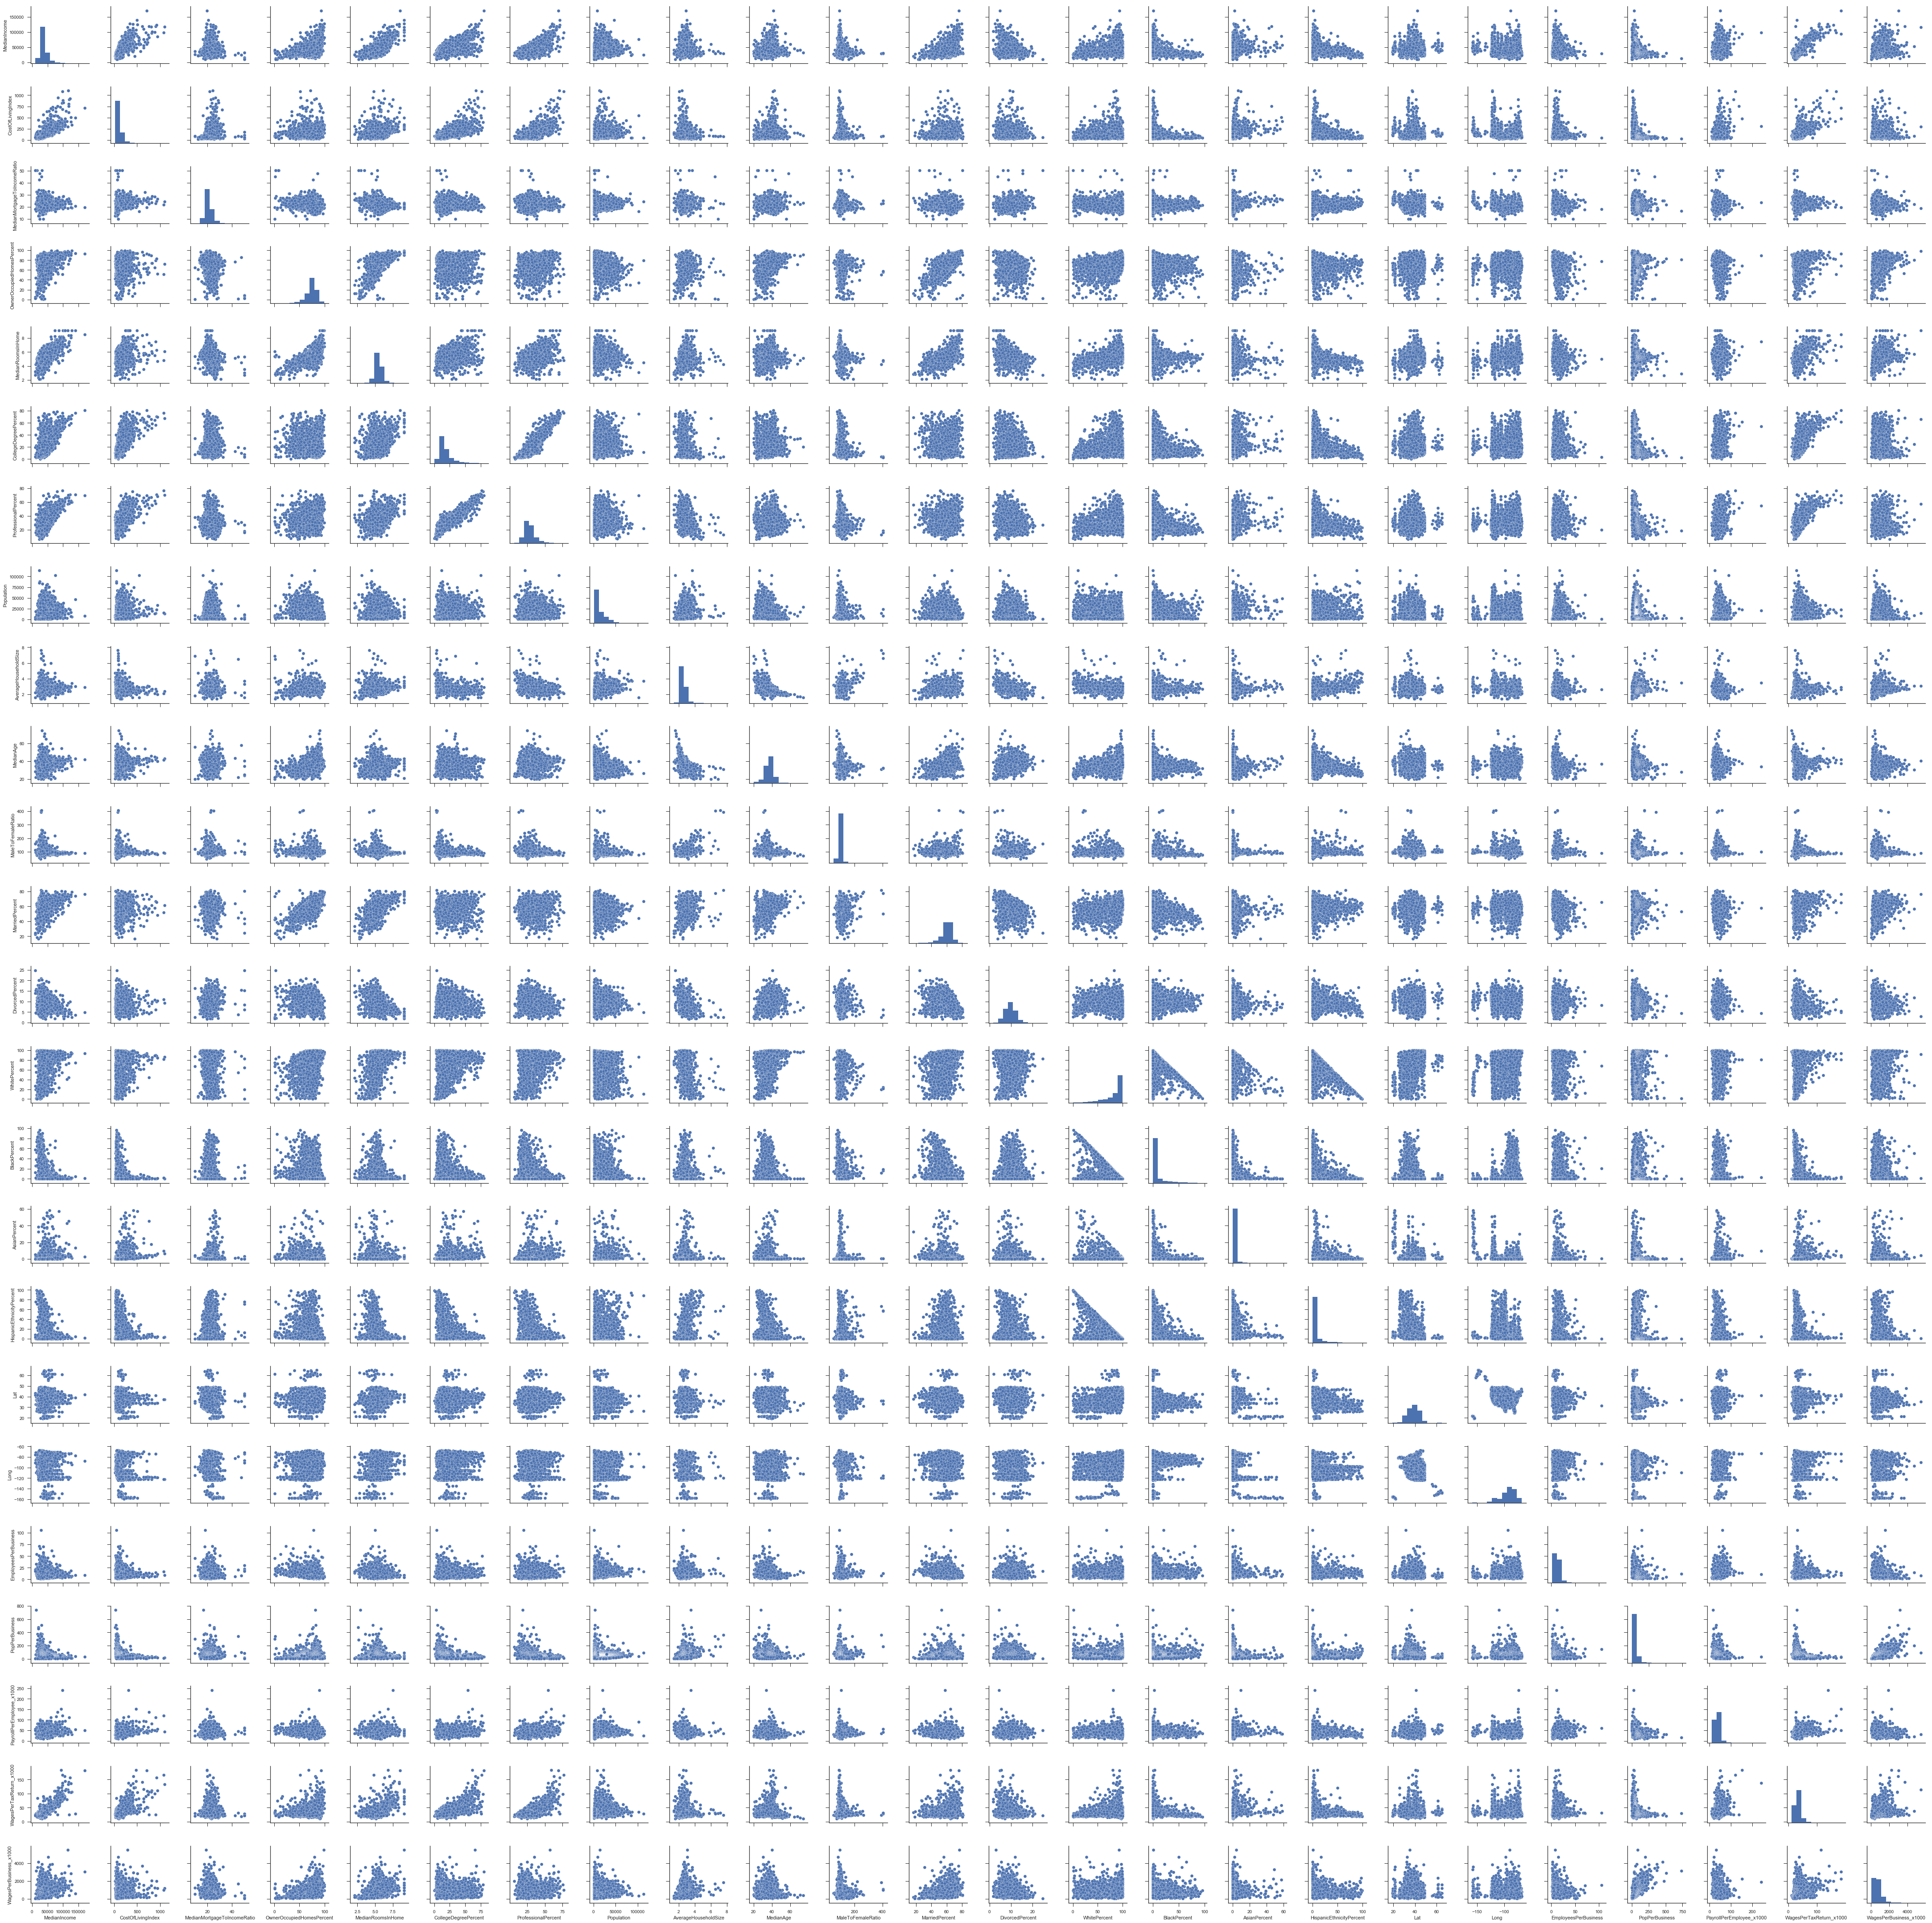

In [274]:
# Pairwise relationships
sns.pairplot(df6)

In [275]:
df6.corr()

MedianIncome  CostOfLivingIndex  \
MedianIncome                     1.000000           0.757502   
CostOfLivingIndex                0.757502           1.000000   
MedianMortgageToIncomeRatio      0.150127           0.417062   
OwnerOccupiedHomesPercent        0.261524          -0.077331   
MedianRoomsInHome                0.606475           0.219312   
CollegeDegreePercent             0.682763           0.713197   
ProfessionalPercent              0.652528           0.620727   
Population                       0.201749           0.242535   
AverageHouseholdSize             0.144773           0.049990   
MedianAge                        0.006806           0.022614   
MaleToFemaleRatio                0.037952           0.060467   
MarriedPercent                   0.329437           0.015637   
DivorcedPercent                 -0.239758          -0.075122   
WhitePercent                     0.193690           0.029709   
BlackPercent                    -0.236843          -0.170348   
AsianPercent                     0.259976           0.393903   
HispanicEthnicityPercent        -0.082913           0.012629   
Lat                              0.143187           0.068762   
Long                            -0.004194          -0.207678   
EmployeesPerBusiness             0.002049          -0.012237   
PopPerBusiness                  -0.210773          -0.221840   
PayrollPerEmployee_x1000         0.360271           0.350821   
WagesPerTaxReturn_x1000          0.851463           0.708179   
WagesPerBusiness_x1000           0.375722           0.172628   

                             MedianMortgageToIncomeRatio  \
MedianIncome                                    0.150127   
CostOfLivingIndex                               0.417062   
MedianMortgageToIncomeRatio                     1.000000   
OwnerOccupiedHomesPercent                      -0.189936   
MedianRoomsInHome                              -0.187205   
CollegeDegreePercent                            0.173285   
ProfessionalPercent                             0.094355   
Population                                      0.149085   
AverageHouseholdSize                            0.110654   
MedianAge                                      -0.021171   
MaleToFemaleRatio                               0.114095   
MarriedPercent                                 -0.134854   
DivorcedPercent                                 0.135687   
WhitePercent                                   -0.229274   
BlackPercent                                    0.038394   
AsianPercent                                    0.243296   
HispanicEthnicityPercent                        0.207948   
Lat                                            -0.042279   
Long                                           -0.239390   
EmployeesPerBusiness                           -0.048385   
PopPerBusiness                                  0.004337   
PayrollPerEmployee_x1000                        0.071050   
WagesPerTaxReturn_x1000                         0.114639   
WagesPerBusiness_x1000                          0.048027   

                             OwnerOccupiedHomesPercent  MedianRoomsInHome  \
MedianIncome                                  0.261524           0.606475   
CostOfLivingIndex                            -0.077331           0.219312   
MedianMortgageToIncomeRatio                  -0.189936          -0.187205   
OwnerOccupiedHomesPercent                     1.000000           0.553615   
MedianRoomsInHome                             0.553615           1.000000   
CollegeDegreePercent                         -0.155644           0.286352   
ProfessionalPercent                          -0.050643           0.353891   
Population                                   -0.421594          -0.087360   
AverageHouseholdSize                         -0.022310           0.082646   
MedianAge                                     0.400792           0.116043   
MaleToFemaleRatio                            -0.067117          -0.131334   
Mar

/Users/green/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


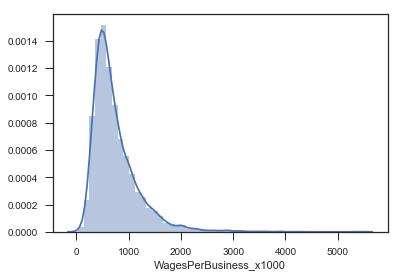

In [276]:
sns.distplot(df6['WagesPerBusiness_x1000']) # Distribution of Target variable; I forgot how to get rid of the warning.

In [277]:
# The Target has a fairly symmetric distribution, 
# slightly right-skewed, but I think tolerable.

In [278]:
df7=df6.loc[:,['PopPerBusiness','MedianIncome','MedianAge','AverageHouseholdSize']]

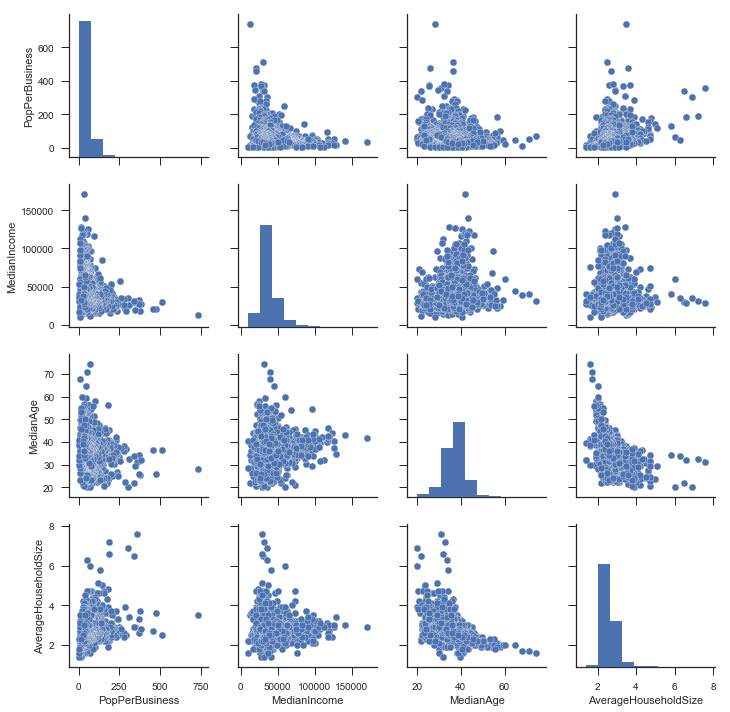

In [279]:
sns.pairplot(df7) # Pair plot of some of the predictors

### Regression

In [306]:
from __future__ import division, print_function  # Python 2 and 3 Compatibility

In [313]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from matplotlib import pyplot as plt

In [389]:
# Baseline Ordinary Least Squares [OLS] Regression model & regression summary stats; Backward Selected.
X=df6[['MedianIncome','CostOfLivingIndex','MedianMortgageToIncomeRatio','OwnerOccupiedHomesPercent',
       'MedianRoomsInHome','CollegeDegreePercent','ProfessionalPercent','PopPerBusiness','AverageHouseholdSize',
       'MedianAge','Lat']] # There is some known multicollinearity.
y=df6['WagesPerBusiness_x1000']
# Wages were taken from Individual Tax returns, and number of businesses from another source.

In [390]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3836, 11) (3836,)
(1644, 11) (1644,)


In [428]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictionst = lm.predict(X_train)
predictionst

array([ 482.06808981,  868.14378837,  673.91703502, ..., 1371.3581609 ,
        785.90654754,  408.10104721])

In [429]:
print ('Score:', model.score(X_train, y_train))

Score: 0.7636506343385143


Text(0,0.5,'Predictions')

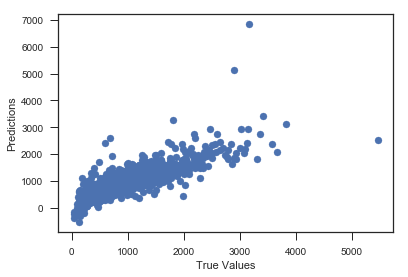

In [430]:
plt.scatter(y_train, predictionst)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [431]:
print ('Score:', model.score(X_test, y_test))

Score: 0.7380286059790157


In [469]:
OLSpreds = model.predict(X)

In [470]:
#RMSE
np.sqrt(np.mean((OLSpreds - y)**2))

220.86749649721247

I will also try sm.OLS

In [432]:
model1 = sm.OLS(y_train,sm.add_constant(X_train),normalize=True)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     WagesPerBusiness_x1000   R-squared:                       0.764
Model:                                OLS   Adj. R-squared:                  0.763
Method:                     Least Squares   F-statistic:                     1123.
Date:                    Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                            11:39:20   Log-Likelihood:                -26095.
No. Observations:                    3836   AIC:                         5.221e+04
Df Residuals:                        3824   BIC:                         5.229e+04
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         530.4801     78.619      6.747      0.000     376.340     684.620
MedianIncome                    0.0225      0.001     35.566      0.000       0.021       0.024
CostOfLivingIndex              -0.4463      0.095     -4.703      0.000      -0.632      -0.260
MedianMortgageToIncomeRatio     4.3042      1.506      2.859      0.004       1.352       7.256
OwnerOccupiedHomesPercent       4.9669      0.481     10.329      0.000       4.024       5.910
MedianRoomsInHome             -20.9250      9.470     -2.209      0.027     -39.493      -2.357
CollegeDegreePercent           -6.1511      0.876     -7.023      0.000      -7.868      -4.434
ProfessionalPercent             4.6514      0.991      4.693      0.000       2.708       6.594
PopPerBusiness                  9.5502      0.115     83.007      0.000       9.325       9.776
AverageHouseholdSize         -233.0960     14.360    -16.232      0.000    -261.250    -204.942
MedianAge                     -17.7935      1.132    -15.717      0.000     -20.013     -15.574
Lat                            -4.6867      0.712     -6.581      0.000      -6.083      -3.290
==============================================================================
Omnibus:                     1359.097   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264945.905
Skew:                          -0.494   Prob(JB):                         0.00
Kurtosis:                      43.702   Cond. No.                     9.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

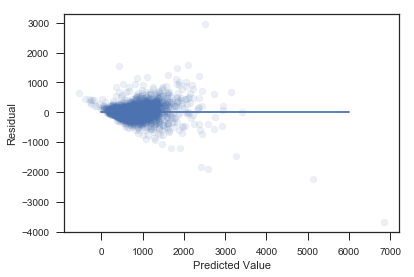

In [434]:
y_predt = results1.predict(sm.add_constant(X_train))

plt.scatter(y_predt,y_train-y_predt,alpha=.1)
plt.plot(np.linspace(0,6000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [467]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([288.97931627, 515.41015575, 506.49696217, ..., 405.36045259,
       665.96211603, 949.99965416])

Text(0,0.5,'Residual')

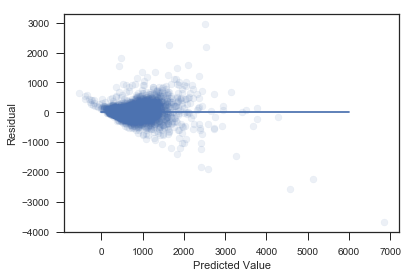

In [468]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,6000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

/Users/green/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/green/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


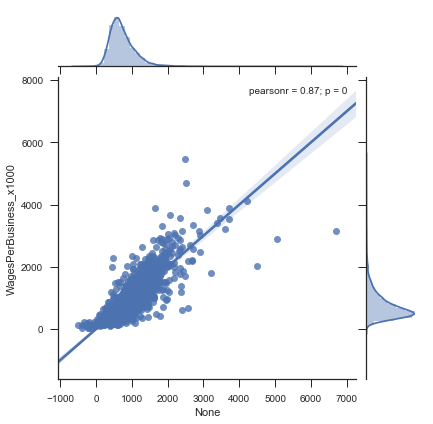

In [329]:
# the residual plot shows some heteroskedasticity,
# partly explained by the constraint of no negative wages values
ax = sns.jointplot(y_pred, y, kind='regplot') # I forgot how to get rid of the warning.

In [330]:
# Initially, it looks like there might be slight outlier influence
# I re-ran the analysis after excluding the three data on the right edge of the actual by predicted plot,
# but the model did not change much at all.

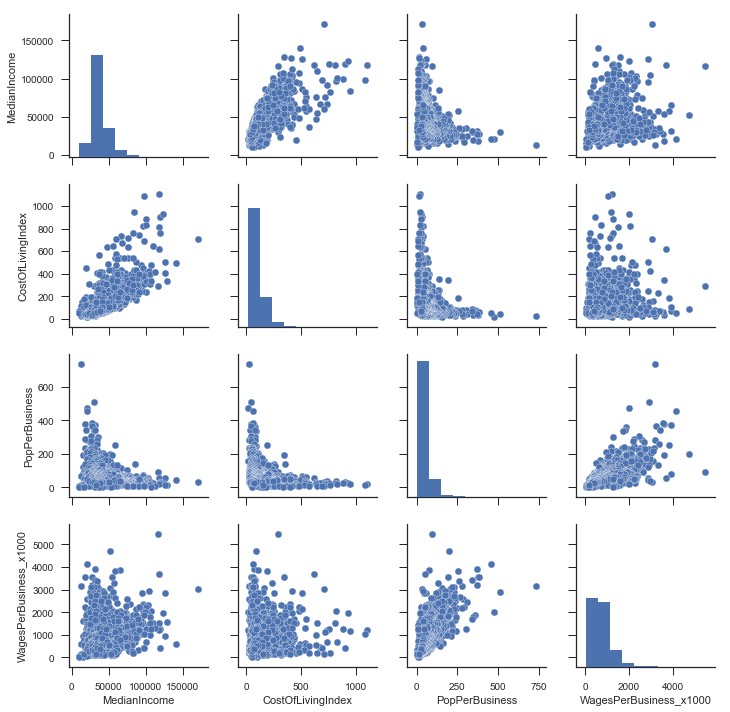

In [331]:
z=df6[['MedianIncome','CostOfLivingIndex','PopPerBusiness','WagesPerBusiness_x1000']]
sns.pairplot(z)

In [332]:
# Strong correlations exist, but none are perfect 1:1 correlations with the Target Variable
# I would argue the classical assumptions of OLS hold.

### Ridge Regression

In [397]:
from sklearn.linear_model import RidgeCV

regRcv = RidgeCV(normalize=True,cv=5)
regRcv.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, fit_intercept=True, gcv_mode=None,
    normalize=True, scoring=None, store_cv_values=False)

In [441]:
print(regRcv.alpha_)
print(regRcv.intercept_)
# print(regRcv.predict([[0, 0]]))
print('Ridge regression training score val R^2: %.3f' %regRcv.score(X_train,y_train))
print('Ridge regression test score val R^2: %.3f' %regRcv.score(X_test,y_test))

0.1
99.40867278532346
Ridge regression training score val R^2: 0.747
Ridge regression test score val R^2: 0.731


In [399]:
regRcv.get_params(deep=True)

{'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': True,
 'scoring': None,
 'store_cv_values': False}

In [402]:
list(zip(X_train,regRcv.coef_))

[('MedianIncome', 0.014656876148256047),
 ('CostOfLivingIndex', 0.11915823053879962),
 ('MedianMortgageToIncomeRatio', 2.2119427862472008),
 ('OwnerOccupiedHomesPercent', 5.992041213865924),
 ('MedianRoomsInHome', 23.568925652432263),
 ('CollegeDegreePercent', -1.805055537178565),
 ('ProfessionalPercent', 1.9530426250217288),
 ('PopPerBusiness', 8.457689416079887),
 ('AverageHouseholdSize', -119.5992604312447),
 ('MedianAge', -13.552017160463858),
 ('Lat', -4.746618734402221)]

In [403]:
Rpreds = regRcv.predict(X_train)

In [405]:
#RMSE
np.sqrt(np.mean((Rpreds - y_train)**2))

225.56605046325586

In [406]:
#MAD
np.mean(np.abs(Rpreds - y_train))

140.34520137742427

### Lasso

In [443]:
from sklearn.linear_model import LassoCV
regLcv = LassoCV(normalize=True,cv=5)
regLcv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [444]:
print(regLcv.alpha_)
print(regLcv.intercept_)
# print(regLcv.predict([[0, 0]]))
print('Lasso regression score val R^2: %.3f' %regLcv.score(X,y)) 
print('Lasso regression test score val R^2: %.3f' %regLcv.score(X_test,y_test))

0.0047940091504525455
510.29659499313993
Lasso regression score val R^2: 0.756
Lasso regression test score val R^2: 0.738


In [445]:
regLcv.get_params(deep=True)

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': 1,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [446]:
list(zip(X,regLcv.coef_))

[('MedianIncome', 0.022243999615838606),
 ('CostOfLivingIndex', -0.4249159716128546),
 ('MedianMortgageToIncomeRatio', 3.98721128930322),
 ('OwnerOccupiedHomesPercent', 4.915176101159305),
 ('MedianRoomsInHome', -18.34001951756781),
 ('CollegeDegreePercent', -5.768258384209944),
 ('ProfessionalPercent', 4.213539309208126),
 ('PopPerBusiness', 9.545278467631707),
 ('AverageHouseholdSize', -227.96046112756812),
 ('MedianAge', -17.41717172821539),
 ('Lat', -4.644969424310795)]

In [447]:
Lpreds = regLcv.predict(X)

In [448]:
#RMSE
np.sqrt(np.mean((Lpreds - y)**2))

220.85775247858857

In [449]:
#MAD
np.mean(np.abs(Lpreds - y))

130.38003463391183

#### Elastic Net

In [458]:
from sklearn.linear_model import ElasticNetCV
regENcv = ElasticNetCV(normalize=True, cv=5, random_state=0)
regENcv.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1, normalize=True,
       positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [460]:
print(regENcv.alpha_)
print(regENcv.intercept_)
# print(regENcv.predict([[0, 0]]))
print('Elastic Net regression score val R^2: %.3f' %regENcv.score(X,y))
print('Elastic Net regression training score val R^2: %.3f' %regENcv.score(X_train,y_train))
print('Elastic Net regression test score val R^2: %.3f' %regENcv.score(X_test,y_test))

0.008045439478447138
610.999895061362
Elastic Net regression score val R^2: 0.075
Elastic Net regression training score val R^2: 0.074
Elastic Net regression test score val R^2: 0.075


In [461]:
regENcv.get_params(deep=True)

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': 1,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [462]:
list(zip(X,regENcv.coef_))

[('MedianIncome', 0.0005306723397786638),
 ('CostOfLivingIndex', 0.040686138538794055),
 ('MedianMortgageToIncomeRatio', 0.309557693002085),
 ('OwnerOccupiedHomesPercent', 0.5541373241056482),
 ('MedianRoomsInHome', 7.45686708903796),
 ('CollegeDegreePercent', 0.07613900301814358),
 ('ProfessionalPercent', 0.13837320277003862),
 ('PopPerBusiness', 0.36133475440543683),
 ('AverageHouseholdSize', 13.250373071014696),
 ('MedianAge', -0.6027465383238401),
 ('Lat', -0.42992896581978984)]

In [463]:
ENpreds = regENcv.predict(X)

In [464]:
#RMSE
np.sqrt(np.mean((ENpreds - y)**2))

430.1908566068161

In [465]:
#MAD
np.mean(np.abs(ENpreds - y))

304.62760346528603

### Conclusion

The OLS model produced the highest R-Squared scores.  It seems that regularization doesn't really help in this model case.